#**Modelo Ising**
Consideraremos una red de espines $\sigma_i$, los cuales pueden tomar valores de $+1(\uparrow)$ o $-1(\downarrow)$. Cada espín interactúa con su vecino más cercano y la red está sujeta a algún campo externo. El hamiltoniano del sistema se puede escribir como

$$H = -J\sum_{i=1}^{N-1}\sigma_i\sigma_{i+1} - h\sum_i \sigma_i$$

N = número total de espines

$J$ = constante de interacción

$\sigma=\pm1$, $+1$ para el espín up y $-1$ para el espín down

$h$ es el campo magnético externo

Si consideramos sólo la interacción entre los espines, tenemos que nuestro hamiltoniano es

$$H = -J\sum_{i=1}^{N-1}\sigma_i\sigma_{i+1}$$

* Si $J>0$ los espines vecinos prefieren ubicarse en paralelo (ferromagnetismo)
* Si $J < 0$ los espines vecinos prefieren ubicarse anti-paralelo (anti-ferromagnetismo)

A una temperatura lo suficientemente baja, todos los espines en el modelo Ising "cooperarán" y se alinearán espontáneamente (por ejemplo, la mayoría de los espines se vuelven $+1$) incluso en ausencia del campo externo ($h = 0$). Este fenómeno se llama *magnetización espontánea*.

Sin embargo, no vemos tal fenómeno en el modelo de Ising 1D y, por lo tanto, no hay transición de fase. Pero aún lo resolvemos computacionalmente y calculamos algunas propiedades térmicas como energía, entropía, magnetización y calor específico.

##**Usando el algoritmo de Metropolis**

Tenemos un sistema de espines 1D (que interactúan) a cierta temperatura $T$ y deseamos descubrir las propiedades térmicas importantes como Energía, Entropíay  magnetización de esa cadena de espines. Para esto, tenemos que muestrear (es decir, recopilar datos) sobre grandes estados que experimenta nuestro sistema, debido a la interacción que experimenta cada espín con el entorno, utilizaremos el Algoritmo de Metropolis.

Por ejemplo, si estamos en el microestado $\mu$ y deseamos ir al microestado $\nu$, debemos tener en cuenta la probabilidad de transición de ir desde un estado $\mu$ hacía un estado $\nu$, es decir, $P(\mu → \nu)$. 

La probabilidad $p_{\mu}$ de estar en el estado $\mu$ con energía $E_{\mu} = H_{\mu}$ es

$$p_{\mu} = \dfrac{1}{Z}e^{-\beta H_\mu}$$
donde $Z = \sum_\mu e^{-\beta H_\mu}$ es la función de partición. 

En el equilibrio, se debe cumplir que

$$\sum_{\mu} p_{\mu}P(\mu → \nu) = \sum_{\nu} p_{\nu}P(\nu → \mu)$$


Por métodos numéricos, esto es difícil de hacer cumplir, pero podemos hacer que sea cierto estableciendo la *condición de balance detallado*

$$p_{\mu}P(\mu → \nu) = p_{\nu}P(\nu → \mu)$$

Reacomodando los términos, tenemos:

$$\dfrac{P(\mu → \nu)}{P(\nu → \mu)} = \dfrac{p_{\nu}}{p_{\mu}} = e^{-\beta(E_{\nu} -E_{\mu})}$$

Para encontrar un nuevo estado, podemos seleccionar un espín al azar (por ejemplo $\mu$) y cambiar su signo y de esta manera obtenemos un nuevo estado (por ejemplo $\nu$). 

  \begin{equation}
  P(\mu→\nu) = 
   \begin{cases} 
      1              & \mbox{si } E_{\nu} < E_{\mu}   \\
      e^{-\beta (E_{\nu} -E_{\mu})} & \mbox{si } E_{\nu} > E_{\mu}
   \end{cases}
   \end{equation}

Así que 
* Si $E_{\nu} < E_{\mu}$ entonces aplicaremos el cambio del espín seleccionado al azar, es decir, lo voltearemos y aceptaremos este nuevo estado.

* En el caso contrario, debemos calcular $e^{-\beta (E_{\nu} -E_{\mu})}$ y simultáneamente generar un número aleatorio entre $[0,1]$ (por ejemplo, $r_n$), entonces si $r_n < e^{-\beta(E_{\nu} -E_{\mu})}$ aceptamos la transición y le damos la vuelta al espín; de lo contrario, rechazamos la transición y dejamos el estado como estaba inicialmente.

Pero ¿Por qué solo tenemos que voltear un espín? ¿Por qué no 2 o más?

¡Una cosa que no debe olvidar es que nuestro sistema está interactuando con el medio! por lo tanto, todos los estados no son igualmente probables y su probabilidad viene dada por la distribución de probabilidad de Boltzmann, es decir, $P ∝ e^{ − β E}$ . Si cambiamos un espín, el cambio de energía viene dado por

$$\Delta E = 2 J\sigma_i^{\mu}(\sigma_{i+1}^{\mu} + \sigma_{i-1}^{\mu})$$

y tenemos tres posibles valores $\Delta E \in (-4, 4, 0)$, donde

Y si decidimos voltear dos espines(digamos $i$ y $p$ y asumimos que están separados por 2 espines, es decir,

$$\Delta E = 2 J\sigma_i^{\mu}(\sigma_{i+1}^{\mu} + \sigma_{i-1}^{\mu}) + 2J\sigma_p^{\mu}(\sigma_{p+1}^{\mu} + \sigma_{p-1}^{\mu})$$

tendremos nuevamente tres casos, $\Delta E \in (-8, 8, 0)$

En el primer caso (volteando sólo un espín) obtenemos $e^{-4\beta}$ y en el segundo caso (volteando dos espines) tenemos $e^{-8\beta}$. Así que $e^{-8\beta} < e^{-4\beta}$. Esto significa que es menos probable que hagamos la transición en el segundo caso (volteando dos espines) porque la probabilidad es baja, y si sigue girando más espines simultáneamente, esta probabilidad seguirá disminuyeno.


##**¿Cómo aplicar el algoritmo de Metropolis?**

La idea es encontrar el estado de equilibrio en un material magnético a una temperatura particular dada $T$. Comenzaremos con una red aleatoria de espines, algunos apuntando hacia arriba y otros hacia abajo, y aplicaremos Metropolis usando la condición de equilibrio detallado hasta que estos se organicen llegando a una condición de equilibrio.

1. Establezca el número de espines
2. Establezca el estado actual $\mu$.
3. Elija una partícula al azar en la red y cambie la orientación del espín (estado $\nu$). Queremos encontrar la probabilidad $P(\mu → \nu)$ de aceptar este nuevo estado.
4.   Tenga en cuenta que la probabilidad de transición está dada por:

\begin{equation}
  P(\mu→\nu) = 
   \begin{cases} 
      1              & \mbox{si } E_{\nu} < E_{\mu}   \\
      e^{-\beta (E_{\nu} -E_{\mu})} & \mbox{si } E_{\nu} > E_{\mu}
   \end{cases}
   \end{equation}

4. Cambie al estado $\nu$ (es decir, cambie el espín de la partícula) con las probabilidades descritas anteriormente; es decir,  
* Si $E_{\nu} < E_{\mu}$ entonces aplicaremos el cambio del espín seleccionado al azar, es decir, lo voltearemos y aceptaremos este nuevo estado.

* Si $E_{\nu} > E_{\mu}$ debemos calcular $e^{-\beta (E_{\nu} -E_{\mu})}$
* Generamos un número aleatorio entre $[0, 1]$.
* Si $r_n < e^{-\beta(E_{\nu} -E_{\mu})}$ aceptamos la transición y le damos la vuelta al espín; de lo contrario, rechazamos la transición y dejamos el estado como estaba inicialmente.

5. Vuelve al paso 1. Repítalo $N$ veces y eventualmente forzará un estado de equilibrio.


Por lo tanto, lo único que necesita ser evaluado es 

$$-\beta (E_{\nu} -E_{\mu}) = -\beta J \sum_{k = 1}^2 \sigma_i\sigma_k$$

donde $\sigma_i$ es el espín que se está invirtiendo, y $\sigma_k$ son los vecinos más cercanos a ese espín (una dimensión). 



###*Recomendado:*
https://www.coursera.org/learn/statistical-mechanics


In [1]:
#Basado en el libro de W. Krauth
import random, math

L = 16
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
nsteps = 1000000
T = 2.0
beta = 1.0 / T
S = [random.choice([1, -1]) for k in range(N)]
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])

    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        
print(S, sum(S))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 232


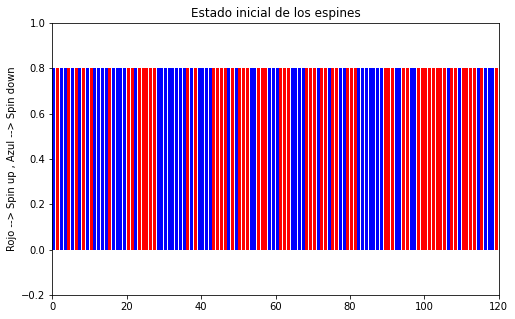

In [2]:
##importando librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as pt

N = 120  #número de espines
spin_values = np.array([1,-1]) #Estados posibles de los espines
Spin_array = np.random.choice(spin_values,size = N) #Escribe una cadena de N elementos y a cada sitio le asigna un valor aletaorio de +1 o -1

J = 1 #constante de intercambio
T = 0.05 #Temperatura
Beta = 1.0/T 

def spin_color(SS):   ## esta función es para dibujar los espines. spin-down (azul) y el spin-up (rojo)
    if SS==-1: return 'b';
    else: return 'r'

fig,(ax1) = plt.subplots(nrows = 1,ncols= 1,figsize = (8,5)) ##creando las figuras

ax1.set_xlim(0,N)  
ax1.set_ylim(-0.2,1)
ax1.set_ylabel("Rojo --> Spin up , Azul --> Spin down")
ax1.set_title("Estado inicial de los espines")

for i in range(N):
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i])) #Dibuja los espines (xy, width, height)
    ax1.add_patch(PP)

Energía inicial E =  17


100%|██████████| 100000/100000 [00:02<00:00, 43138.59it/s]


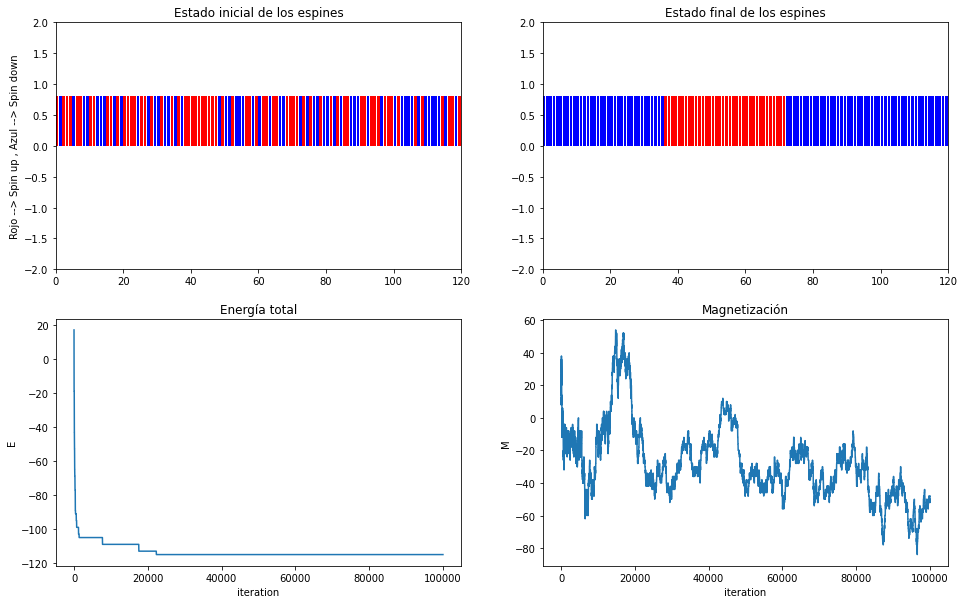

In [6]:
##importando librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as pt
from tqdm import tqdm 

N = 120  #número de espines
spin_values = np.array([1,-1]) #Estados posibles de los espines
Spin_array = np.random.choice(spin_values,size = N) #Escribe una cadena de N elementos y a cada sitio le asigna un valor aletaorio de +1 o -1

J = 1 #constante de intercambio
T = 0.05 #Temperatura
Beta = 1.0/T 

def spin_color(SS):   ## esta función es para dibujar los espines. spin-down (azul) y el spin-up (rojo)
    if SS==-1: return 'b';
    else: return 'r'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (16,10)) ##creando las figuras

ax1.set_xlim(0,N)  
ax1.set_ylim(-2,2)
ax1.set_ylabel("Rojo --> Spin up , Azul --> Spin down")
ax1.set_title("Estado inicial de los espines")

for i in range(N):
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i])) #(xy, width, height)
    ax1.add_patch(PP)

## Calculando la energía inicial 
Energia = 0
for i in range(N-1):
    Energia += -J * Spin_array[i] * Spin_array[i+1]
E = [Energia]    ##almacenar el valor de energía en una lista
print('Energía inicial E = ', Energia )

##Magnetización inicial 
M = np.sum(Spin_array)
Mag = [M]  #almacenar el valor de la magnetización en una lista

iter = 100000
STEP = [0]  
for i in tqdm(range(iter)):
    r_n = np.random.randint(0,N)  #Generando el número aleatorio

    sigma_mu = Spin_array[r_n] ## indexando el valor del espín

    Delta_M = -2*sigma_mu  
    Delta_E = 0 

    if(r_n == 0):        
        Delta_E = 2 * J * sigma_mu * (Spin_array[1])

    elif(r_n == N-1):
        Delta_E = 2 * J * sigma_mu * (Spin_array[N-2])
    else:
        Delta_E = 2 * J * sigma_mu * (Spin_array[r_n+1] + Spin_array[r_n-1])
    
    STEP.append(i)
    if(np.random.uniform() < np.exp(-Beta * Delta_E)): #Condición de balance detallado
        Spin_array[r_n] = -1*Spin_array[r_n]
        Energia += Delta_E
        M+= Delta_M
    else:
        Spin_array[r_n] = Spin_array[r_n] 
        
    E.append(Energia)
    Mag.append(M)
        
## Dibujando los estados finales de los espines 
ax2.set_xlim(0,N)
ax2.set_ylim(-2,2)
ax2.set_title("Estado final de los espines")

for i in range(N):
           
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax2.add_patch(PP)

## Dibujando la energía vs pasos para alcanzar el equilibrio     
ax3.set_title('Energía total')
ax3.set_xlabel('iteration')
ax3.set_ylabel('E')
ax3.plot(STEP,E)

ax4.set_title('Magnetización')
ax4.set_xlabel('iteration')
ax4.set_ylabel('M')
ax4.plot(STEP,np.array(Mag))
plt.show()

In [7]:
## Calculando la energía inicial 
Energia = 0
for i in range(N-1):
    Energia += -J * Spin_array[i] * Spin_array[i+1]
E = [Energia]    ##almacenar el valor de energía en una lista
print('Energía inicial E = ', Energia )

##Magnetización inicial 
M = np.sum(Spin_array)
Mag = [M]  #almacenar el valor de la magnetización en una lista

iter = 100000
STEP = [0]  
for i in tqdm(range(iter)):
    r_n = np.random.randint(0,N)  #Generando el número aleatorio

    sigma_mu = Spin_array[r_n] ## indexando el valor del espín

    Delta_M = -2*sigma_mu  
    Delta_E = 0 

    if(r_n == 0):        
        Delta_E = 2 * J * sigma_mu * (Spin_array[1])

    elif(r_n == N-1):
        Delta_E = 2 * J * sigma_mu * (Spin_array[N-2])
    else:
        Delta_E = 2 * J * sigma_mu * (Spin_array[r_n+1] + Spin_array[r_n-1])
    
    STEP.append(i)
    if(np.random.uniform() < np.exp(-Beta * Delta_E)): #Condición de balance detallado
        Spin_array[r_n] = -1*Spin_array[r_n]
        Energia += Delta_E
        M+= Delta_M
    else:
        Spin_array[r_n] = Spin_array[r_n] 
        
    E.append(Energia)
    Mag.append(M)


med_E = np.sum(E)/len(E)
med_E2 = np.sum(E**2)/len(E)

Otras propiedades que podemos encontrar por medio de  los resultados obtenidos con Metropolis son:

**Energía total** 
\begin{align}
E= -J\sum_{i=1}^{N-1} \sigma_{i}\sigma_{i+1} \\
\end{align}
**Calor específico por espn**
\begin{align}
C = \frac{\beta ^2}{N} \bigg [\big <E^2 \big > - \big <E \big >^2 \bigg ] 
\end{align}
**Magnetización**  
\begin{align}
M = \sum_{i} \frac{\sigma_i}{N}
\end{align}
**Entropía**
\begin{align}
S = \frac{N!}{n_{+}!n_{-}!} 
\end{align}


Analíticamente, tomando $k_B = 1$, tenemos que:

**Energía total** 
\begin{align}
E= -NJ  \tanh(J/T)
\end{align}
**Calor específico**
\begin{align}
C = N\bigg (\frac{J}{T}\bigg )^2 sech ^2(J/T)
\end{align}
**Entropía**
\begin{align}
S = ln2 + N \bigg [-\frac{J}{T} \tanh(J/T) + ln[2cosh(J/T)] \bigg ]
\end{align}

###*Recomendado*
Machine Learning
https://rramosp.github.io/ai4eng.v1.20211.udea/intro.html

Deep Learning
https://rramosp.github.io/2021.deeplearning/intro.html

Visualización de datos

https://realpython.com/pandas-plot-python/


[1] Landau, R. H., Páez, M. J. (2018). Computational problems for physics. With Guided Solutions Using Python. CRC Press

[2] Krauth, W. (2006). Statistical mechanics: algorithms and computations (Vol. 13). OUP Oxford.

[3] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.

https://www.compphy.com/ising-model-1d-interacting-spins-in-absence-of-external-field/



